# Modèle avec forme longitudinale en canal trapezoidal

In [174]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd
from config import large_figure_width, large_figure_height, standard_figure_width, standard_figure_height

g=9.81

## Définition des fonctions

In [2]:
# Variables adimensionnées
# ut=u/V
# zt=z/H

# Données adimensionnées
# m = Ab/Ac = B*T/W*H
# F = V/sqrt(g*h)
# delta = H/T
# k = puissance de la fonction carène (à relier au coeff de bloc)

def Schijf_adim(p):
    ut=p[0]
    zt=p[1]
    return [(1-m-zt)*(1+ut)-1,0.5*(1+ut)**2-zt/(F**2)-0.5]

def Schijf_adim_Jac(p):
    ut=p[0]
    zt=p[1]
    return [[(1-m-zt),(1+ut)],[1+ut,-1/(F**2)]]


def Schijf_smooth_adim(p):
    ut=p[:N]
    zt=p[N:]
    x=np.linspace(0,1,N)
    zt_b=np.sum(zt*B_adim(x))/np.sum(B_adim(x))
    return np.block([(1-m*B_adim(x)*(1-delta*(zt-zt_b))-zt)*(1+ut)-1,0.5*(1+ut)**2-zt/(F**2)-0.5])

 
def Schijf_smooth_adim_Jac(p):
    ut=p[:N]
    zt=p[N:2*N]
    x=np.linspace(0,1,N)
    
    zt_b=np.sum(zt*B_adim(x))/np.sum(B_adim(x))
    zt_b_prime=B_adim(x)/np.sum(B_adim(x))

    
    Bloc1=np.zeros((N,N))
    Bloc2=np.zeros((N,N))
    Bloc3=np.zeros((N,N))
    Bloc4=np.zeros((N,N))

    for i in range(N):
        Bloc1[i,i]=(1-m*B_adim(x[i])*(1-delta*(zt[i]-zt_b))-zt[i])
        Bloc2[i,i]=(-m*B_adim(x[i])*(-delta)-1)*(1+ut[i])
        Bloc3[i,i]=1+ut[i]
        Bloc4[i,i]=-1/(F**2)

    for j in range(N):
        for i in range(N):
            Bloc2[i,j]+=-m*B_adim(x[i])*(delta*zt_b_prime[j])*(1+ut[i])
    
    return np.block([[Bloc1,Bloc2],[Bloc3,Bloc4]])
        


def Schijf_smooth_trapeze_adim(p):
    ut=p[:N]
    zt=p[N:]
    x=np.linspace(0,1,N)
    zt_b=np.sum(zt*B_adim(x))/np.sum(B_adim(x))
    return np.block([(1-m*B_adim(x)*(1-delta*(zt-zt_b))-zt+pente*zt**2*Hm**2)*(1+ut)-1,0.5*(1+ut)**2-zt/(F**2)-0.5])

 
def Schijf_smooth_adim_trapeze_Jac(p):
    ut=p[:N]
    zt=p[N:2*N]
    x=np.linspace(0,1,N)
    
    zt_b=np.sum(zt*B_adim(x))/np.sum(B_adim(x))
    zt_b_prime=B_adim(x)/np.sum(B_adim(x))

    
    Bloc1=np.zeros((N,N))
    Bloc2=np.zeros((N,N))
    Bloc3=np.zeros((N,N))
    Bloc4=np.zeros((N,N))

    for i in range(N):
        Bloc1[i,i]=(1-m*B_adim(x[i])*(1-delta*(zt[i]-zt_b))-zt[i]+pente*Hm**2*zt[i]**2)
        Bloc2[i,i]=(-m*B_adim(x[i])*(-delta)-1)*(1+ut[i])
        Bloc3[i,i]=1+ut[i]
        Bloc4[i,i]=-1/(F**2)

    for j in range(N):
        for i in range(N):
            Bloc2[i,j]+=-m*B_adim(x[i])*(delta*zt_b_prime[j])*(1+ut[i])
    
    return np.block([[Bloc1,Bloc2],[Bloc3,Bloc4]])
        
    
def B_adim(x):
    return bateau(x)

def Wigley(x):
    x0 = 1/2
    return (1-(2*(x-x0))**2)
    
def Caplier(x):
    x0 = 1/2
    return (1-(2*(x-x0))**8)

    
def Prisme(x):
    filt=(x<epsilon)+(x>1-epsilon)
    return x*(x<epsilon)/epsilon+(x>epsilon)*(x<1-epsilon)+(1-x)*(x>1-epsilon)/epsilon
    


## Résolution pour un jeux de paramètre

2.0


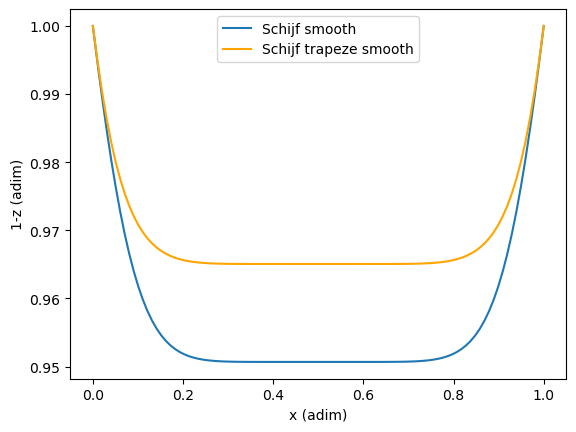

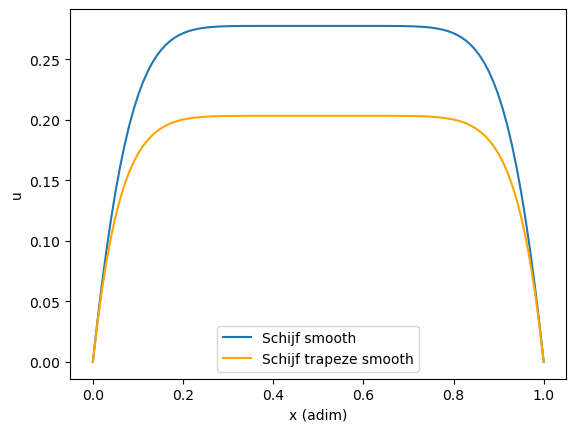

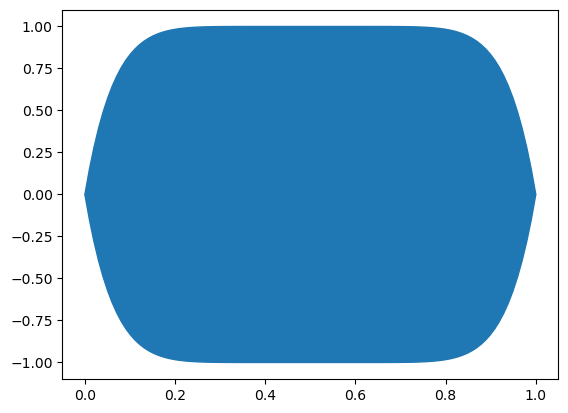

In [13]:

bateau = Caplier

W = 54  # Largeur au miroir
w = 36
T = 3   # Tirant d'eau
B = 11.4  # Maître-bau
h = 4.5  # Hauteur
delta = h/T

epsilon = 0.2

Ac = (W+w)*h/2  # Surface de la section transversale
Ab = B * T  # Surface de la base
Hm = Ac / W  # Hauteur moyenne
m = Ab / Ac  # Rapport des surfaces
pente = (W-w)/2/h


print(pente)
N=100

F=0.395




f,a=plt.subplots()
g,b=plt.subplots()



p0=np.zeros(2*N)
p0[:N]=p0[:N]+1


res0=scipy.optimize.fsolve(Schijf_smooth_adim, p0 , fprime=Schijf_smooth_adim_Jac,full_output=True)

Z0=(res0[0])[N:]
U0=(res0[0])[:N]
x=np.linspace(0,1,N)



res=scipy.optimize.fsolve(Schijf_smooth_trapeze_adim, p0 , fprime=Schijf_smooth_adim_Jac,full_output=True)
Z=(res[0])[N:]
U=(res[0])[:N]

a.plot(x,1-Z0,color='tab:blue', label = 'Schijf smooth')
a.plot(x,1-Z,color='orange', label = 'Schijf trapeze smooth')

b.plot(x,U0,color='tab:blue', label = 'Schijf smooth')
b.plot(x,U,color='orange', label = 'Schijf trapeze smooth')

a.legend()
b.legend()
h,c=plt.subplots()
c.fill(x,B_adim(x),x,-B_adim(x),color='tab:blue')


b.set_xlabel('x (adim)')
b.set_ylabel('u')

a.set_xlabel('x (adim)')
a.set_ylabel('1-z (adim)')


plt.show()


### Comparaison entre les différents bateaux

(100,)
(100,)
(100,)


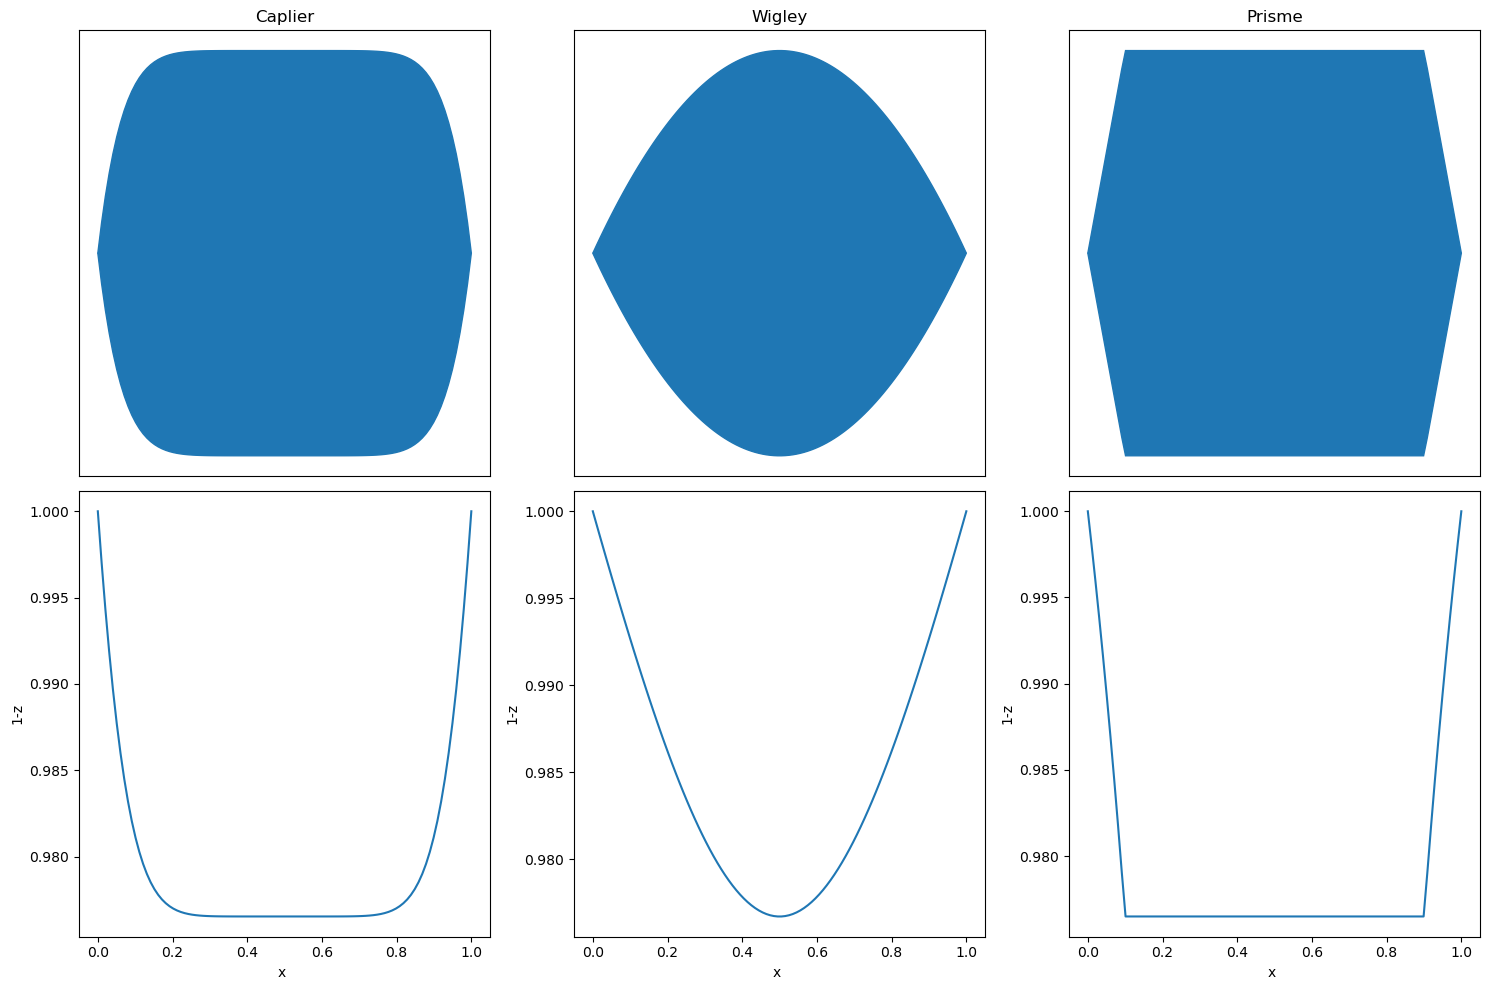

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Définir les fonctions des bateaux
def B_adim(x):
    return bateau(x)

def Wigley(x):
    x0 = 1/2
    return (1 - (2 * (x - x0))**2)
    
def Caplier(x):
    x0 = 1/2
    return (1 - (2 * (x - x0))**8)

def Prisme(x):
    epsilon = 0.1  # Vous pouvez ajuster epsilon ici si nécessaire
    return (x * (x < epsilon) / epsilon) + ((x > epsilon) * (x < 1 - epsilon)) + ((1 - x) * (x > 1 - epsilon) / epsilon)

# Assurez-vous que ces fonctions sont bien définies
# def Schijf_smooth_adim(p):
#     ...
# def Schijf_smooth_adim_Jac(p):
#     ...

N = 100
p0 = np.zeros(2 * N)
p0[:N] = p0[:N] + 1
x = np.linspace(0, 1, N)

# Fonction pour résoudre le système pour un bateau donné
def solve_schijf():
    res = scipy.optimize.fsolve(Schijf_smooth_adim, p0, fprime=Schijf_smooth_adim_Jac, full_output=True)
    Z = (res[0])[N:]
    U = (res[0])[:N]
    return Z, U

# Liste des bateaux et des noms associés
bateaux = [Caplier, Wigley, Prisme]
noms = ["Caplier", "Wigley", "Prisme"]

# Création de la figure avec 3 sous-graphes (2 lignes, 3 colonnes)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Itération sur les bateaux
for i, bateau in enumerate(bateaux):
    Z, U = solve_schijf()  # Résoudre pour chaque bateau
    print (np.shape(x))
    # Tracé de la forme du bateau
    axs[0, i].fill(x, B_adim(x), x, -B_adim(x), color='tab:blue')
    axs[1, i].plot(x, 1 - Z, color='tab:blue')
    
    # Titre des sous-graphes
    axs[0, i].set_title(f"{noms[i]}")
    # axs[1, i].set_title(f"1-z vs x - {noms[i]}")

# Ajouter des étiquettes aux axes
for i in range(3):
    axs[1, i].set_xlabel('x ')
    axs[1, i].set_ylabel('1-z')
    # axs[0, i].set_xlabel('x')
    axs[0, i].set_xticks([]) 
    axs[0, i].set_yticks([])  


# Ajuster l'espacement des sous-graphes
plt.tight_layout()

# Afficher le graphique
plt.savefig( '../figures/complet-bateaux.pdf', bbox_inches = 'tight' )
plt.show()


### Avec le bateau en 3D

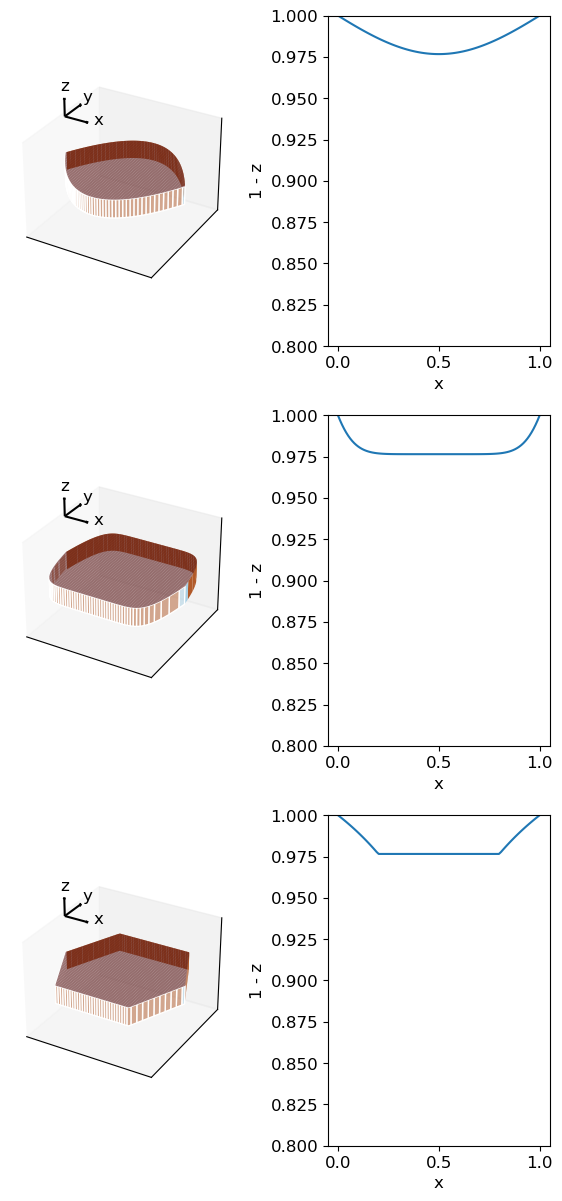

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres globaux
N = 100
x = np.linspace(0, 1, N)

# Définition des fonctions de forme des bateaux
def B_adim(x):
    return bateau(x)

def Wigley(x):
    x0 = 1/2
    return (1 - (2*(x - x0))**2)

def Caplier(x):
    x0 = 1/2
    return (1 - (2*(x - x0))**8)

def Prisme(x):
    filt = (x < epsilon) + (x > 1 - epsilon)
    return x*(x < epsilon)/epsilon + (x > epsilon)*(x < 1 - epsilon) + (1 - x)*(x > 1 - epsilon)/epsilon


def solve_schijf():
    res = scipy.optimize.fsolve(Schijf_smooth_adim, p0, fprime=Schijf_smooth_adim_Jac, full_output=True)
    z = (res[0])[N:]
    u = (res[0])[:N]
    return z, u

# Liste des formes de bateaux et de leurs noms
bateaux = [(Wigley, "Wigley"), (Caplier, "Caplier"), (Prisme, "Prisme")]
epsilon = 0.2  # Définir epsilon pour Prisme

# Création de la figure 3D
fig_size = (large_figure_width, 3*large_figure_height)
fig = plt.figure(figsize=fig_size)

# Itération sur les bateaux
for i, (bateau, bateau_nom) in enumerate(bateaux):
    ax3d = fig.add_subplot(len(bateaux), 2, 2*i + 1, projection='3d')
    ax2d = fig.add_subplot(len(bateaux), 2, 2*i + 2)
    
    
    z, u = solve_schijf()
    
    # Création des données pour les plans z = 0 et z = 1
    X = np.linspace(0, 1, N)
    Z = np.array([0.4, 0.6])  # Deux plans z = 0 et z = 1
    X, Z = np.meshgrid(X, Z)
    
    # Largeur du bateau le long de l'axe y
    Ypos = bateau(X)
    Yneg = -bateau(X) 
    
    
    ax3d.plot_surface(X, Ypos, Z, cmap='Paired', edgecolor='none')
    ax3d.plot_surface(X, Yneg, Z, cmap='Paired', edgecolor='white', alpha=0.5)




    
    X0, Z0 = np.meshgrid(np.linspace(0, 1, N), np.array([0.6]))  # Plan Z = 0
    Yfill = np.vstack([Ypos[0], Yneg[0]])  # Combine Ypos et Yneg pour créer un "remplissage"
         
    ax3d.plot_surface(X0, Yfill, Z0, color='brown', alpha=0.6, edgecolor='none')
    ax3d.quiver(0, 0, 1, 0.2, 0, 0, color='black', arrow_length_ratio=0.1)   # Axe x 
    ax3d.quiver(0, 0, 1, 0, 0.5, 0, color='black', arrow_length_ratio=0.1) # Axe y 
    ax3d.quiver(0, 0, 1, 0, 0, 0.2, color='black', arrow_length_ratio=0.1)  # Axe z 
    ax3d.text(.25, 0, 1, 'x', color='black', fontsize=12)    
    ax3d.text(0, .55, 1.02, 'y', color='black', fontsize=12)  
    ax3d.text(0, -0.1, 1.3, 'z', color='black', fontsize=12)  
    
    
    
    # # Réglage des axes
    # ax.set_title(f"{bateau_nom}")
    ax3d.set_xticks([]) 
    ax3d.set_yticks([])
    ax3d.set_zticks([])
    # ax3d.set_xlabel('x')
    # ax3d.set_ylabel('y')
    # ax3d.set_zlabel('z')
    ax3d.set_xlim(0, 1)
    # ax3d.set_ylim(0, 1)
    ax3d.set_zlim(0, 1)  

    
    
    ax2d.plot(x, 1 - z, color='tab:blue')
    ax2d.set_xlabel('x')
    ax2d.set_ylabel('1 - z')
    ax2d.set_ylim(0.8, 1)    
    
    
    
# Ajuster l'espacement des sous-graphes
plt.tight_layout()
plt.savefig( '../figures/complet-bateaux.pdf', bbox_inches = 'tight' )
# Afficher le graphique
plt.show()


### Effet de pente

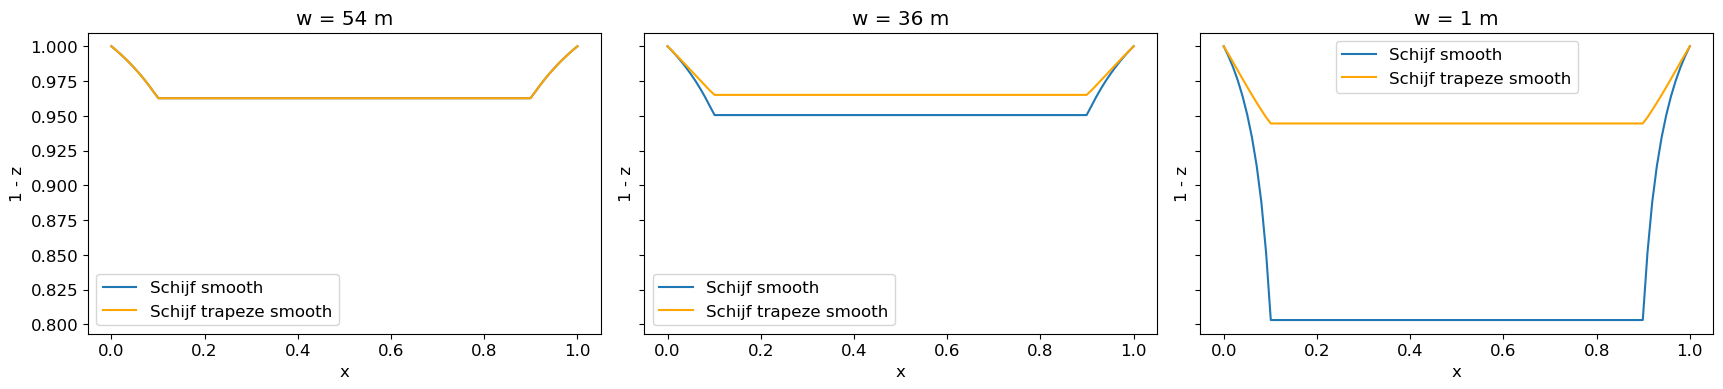

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Paramètres globaux
N = 100
x = np.linspace(0, 1, N)

# Paramètres à ajuster
T = 3   # Tirant d'eau
B = 11.4  # Maître-bau
h = 4.5  # Hauteur
delta = h / T
F = 0.395
m = 0.1  # Vous pouvez ajuster si nécessaire
epsilon = 0.1
pente = 0.2
Hm = 1  # Vous pouvez ajuster en fonction de votre configuration

# Liste des valeurs de w
ws = [54, 36, 1]


# Redéfinir B_adim pour s'adapter à un bateau prismatique
def Prisme(x, w):
    filt = (x < epsilon) + (x > 1 - epsilon)
    return x * (x < epsilon) / epsilon + (x > epsilon) * (x < 1 - epsilon) + (1 - x) * (x > 1 - epsilon) / epsilon


large_figure_height = 0.7 * large_figure_width
fig_size = (3*large_figure_width, large_figure_height)

# Création de la figure avec 3 colonnes (une pour chaque w)
fig, axs = plt.subplots(1, len(ws), figsize=fig_size, sharey = True)

# Itération sur les valeurs de w
for i, w in enumerate(ws):

    Ac = (W+w)*h/2  # Surface de la section transversale
    Ab = B * T  # Surface de la base
    Hm = Ac / W  # Hauteur moyenne
    m = Ab / Ac  # Rapport des surfaces
    pente = (W-w)/2/h


    p0=np.zeros(2*N)
    p0[:N]=p0[:N]+1


    res0=scipy.optimize.fsolve(Schijf_smooth_adim, p0 , fprime=Schijf_smooth_adim_Jac,full_output=True)

    Z0=(res0[0])[N:]
    U0=(res0[0])[:N]
    x=np.linspace(0,1,N)



    res=scipy.optimize.fsolve(Schijf_smooth_trapeze_adim, p0 , fprime=Schijf_smooth_adim_Jac,full_output=True)
    Z=(res[0])[N:]
    U=(res[0])[:N]
    
    axs[i].plot(x,1-Z0,color='tab:blue', label = 'Schijf smooth')
    axs[i].plot(x,1-Z,color='orange', label = 'Schijf trapeze smooth')


    # Ajouter un titre et une légende pour chaque subplot
    axs[i].set_title(f"w = {w} m")
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('1 - z')
    axs[i].legend()

# Ajuster l'espacement des sous-graphes
plt.tight_layout()
plt.savefig( '../figures/complet-pentes.pdf', bbox_inches = 'tight' )

# Afficher le graphique
plt.show()


## Résolution en dimensionné

## Boucle sur le Froude

0
0.0
1
3.0
2
5.888888888888889


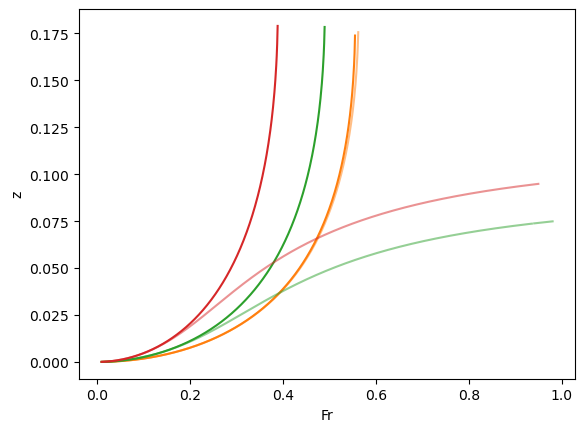

In [79]:
def B_adim(x):
    filt=(x<epsilon)+(x>1-epsilon)
    return x*(x<epsilon)/epsilon+(x>epsilon)*(x<1-epsilon)+(1-x)*(x>1-epsilon)/epsilon


W = 54  # Largeur totale
T = 3   # Tirant d'eau
B = 11.4  # Maître-bau
h = 4.5  # Hauteur
delta = h/T
ks=[1,0.5,0.25,0.125]
w_values = [54, 27, 1]
froudes=np.linspace(0.01,1,1000)
N=20


epsilon = 0.2

i=0
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
cycle_styles=['-', '--', ':', '-.']

for w in w_values:
    print(i)
    i+=1
    Ac = (W+w)*h/2  # Surface de la section transversale
    Ab = B * T  # Surface de la base
    Hm = Ac / W  # Hauteur moyenne
    m = Ab / Ac  # Rapport des surfaces
    pente = (W-w)/2/h
    
    print (pente)
    Zres=[]

    p0=[1,0]
    for F in froudes:
        res=scipy.optimize.fsolve(Schijf_adim, p0 , fprime=Schijf_adim_Jac,full_output=True)
        if(res[2]==1):
            Zres.append((res[0])[1])
            p0=res[0]
        else:
            Zres.append(np.nan)
            p0=[1,0]

    plt.plot(froudes, Zres,color=cycle[i])



    Zres_smooth=[]

    p0=np.zeros(2*N)
    p0[:N]=p0[:N]+1

    for F in froudes:
        res=scipy.optimize.fsolve(Schijf_smooth_adim, p0 , fprime=Schijf_smooth_adim_Jac,full_output=True)
        if(res[2]==1):
            Zres_smooth.append(np.max((res[0])[N:]))
            p0=res[0]
        else:
            Zres_smooth.append(np.nan)
            p0=np.zeros(2*N)
            p0[:N]=p0[:N]+1

    plt.plot(froudes, Zres_smooth,color=cycle[i], alpha = 0.5)
    l+=1

plt.xlabel( 'Fr' )
plt.ylabel( 'z' )
plt.show()

    


Calculs pour w = 54
Calculs pour w = 50
Calculs pour w = 45


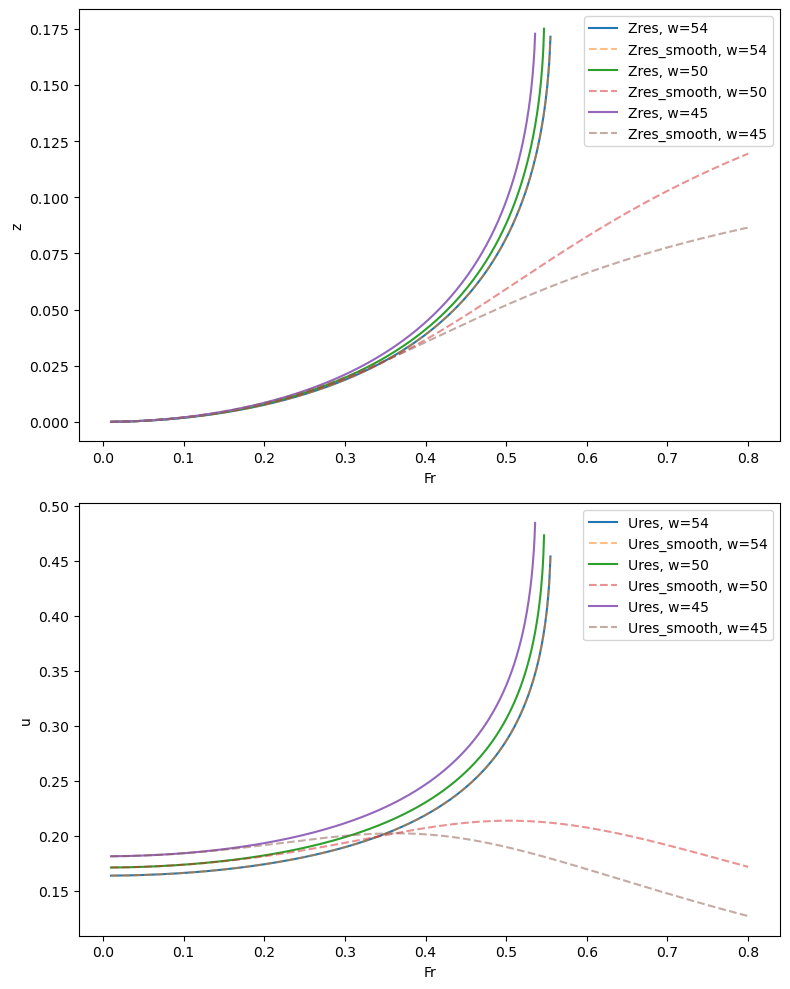

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import json

def B_adim(x):
    filt = (x < epsilon) + (x > 1 - epsilon)
    return x * (x < epsilon) / epsilon + (x > epsilon) * (x < 1 - epsilon) + (1 - x) * (x > 1 - epsilon) / epsilon

# Paramètres initiaux
W = 54  # Largeur totale
T = 3   # Tirant d'eau
B = 11.4  # Maître-bau
h = 4.5  # Hauteur
delta = h / T
ks = [1, 0.5, 0.25, 0.125]
w_values = [54, 50, 45]
froudes = np.linspace(0.01, 0.8, 1000)
N = 20
epsilon = 1e-6

# Résultats
results = {}

i = 0
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
cycle_styles = ['-', '--', ':', '-.']
l = 0  # Initialize l

# Calculs et enregistrement des résultats dans un fichier JSON
for w in w_values:
    print(f"Calculs pour w = {w}")
    Ac = (W + w) * h / 2  # Surface de la section transversale
    Ab = B * T  # Surface de la base
    Hm = Ac / W  # Hauteur moyenne
    m = Ab / Ac  # Rapport des surfaces
    pente = (W-w)/2/h
    
    Zres = []
    Ures = []
    Zres_smooth = []
    Ures_smooth = []

    p0 = [1, 0]
    for F in froudes:
        res = scipy.optimize.fsolve(Schijf_adim, p0, fprime=Schijf_adim_Jac, full_output=True)
        if res[2] == 1:
            Zres.append((res[0])[1])
            Ures.append((res[0])[0])
            p0 = res[0]
        else:
            Zres.append(np.nan)
            Ures.append(np.nan)
            p0 = [1, 0]
    
    p0 = np.zeros(2 * N)
    p0[:N] = p0[:N] + 1

    for F in froudes:
        res = scipy.optimize.fsolve(Schijf_smooth_adim, p0, fprime=Schijf_smooth_adim_Jac, full_output=True)
        if res[2] == 1:
            Zres_smooth.append(np.max((res[0])[N:]))
            Ures_smooth.append(np.max((res[0])[:N]))
            p0 = res[0]
        else:
            Zres_smooth.append(np.nan)
            Ures_smooth.append(np.nan)
            p0 = np.zeros(2 * N)
            p0[:N] = p0[:N] + 1
    
    # Sauvegarder les résultats dans le dictionnaire
    results[w] = {
        'Zres': Zres,
        'Zres_smooth': Zres_smooth, 
        'Ures': Ures,
        'Ures_smooth': Ures_smooth,
    }

# Sauvegarder les résultats dans un fichier JSON
with open('results.json', 'w') as f:
    json.dump(results, f)

# Lecture des résultats depuis le fichier JSON
with open('results.json', 'r') as f:
    loaded_results = json.load(f)

    
fig, ax = plt.subplots(2, 1, figsize=(8, 10))    
    
# Tracer les courbes à partir des résultats lus
for i, (w, data) in enumerate(loaded_results.items()):
    froudes = np.linspace(0.01, 0.8, 1000)
    Zres = data['Zres']
    Zres_smooth = data['Zres_smooth']
    Ures = data['Ures']
    Ures_smooth = data['Ures_smooth']
    ax[0].plot(froudes, Zres, label=f'Zres, w={w}')
    ax[0].plot(froudes, Zres_smooth, linestyle='--', alpha=0.5, label=f'Zres_smooth, w={w}')

    # Tracer Ures et Ures_smooth sur le deuxième subplot (ax[1])
    ax[1].plot(froudes, Ures, label=f'Ures, w={w}')
    ax[1].plot(froudes, Ures_smooth, linestyle='--', alpha=0.5, label=f'Ures_smooth, w={w}')

# Configurer le premier subplot (Zres)
ax[0].set_xlabel('Fr')
ax[0].set_ylabel('z')
ax[0].legend()

# Configurer le deuxième subplot (Ures)
ax[1].set_xlabel('Fr')
ax[1].set_ylabel('u')
ax[1].legend()

plt.tight_layout()

plt.show()